In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [190]:
bike_201701_201806 = pd.read_csv('공공자전거 대여소별 이용정보_201701_201806.csv', encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201807_201811 = pd.read_csv("공공자전거 대여소별 이용정보_201807_11.csv", encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201812_202101 = pd.read_csv('공공자전거 대여소별 이용정보_201812_202101.csv', encoding='cp949',
                                 names=['group', 'spot', 'date', 'rental'],  header=None)
bike_201812_202101 = bike_201812_202101.dropna()

In [191]:
arrange_date1 = []
for i in bike_201701_201806['date']:
    arrange_date1.append(str(i)[1:5]+ str(i)[5:7])
bike_201701_201806['date'] = arrange_date1

arrange_date2 = []
for i in bike_201812_202101['date']:
    arrange_date2.append(str(i)[:4]+ str(i)[4:6])
bike_201812_202101['date'] = arrange_date2

arrange_rental = []
for i in bike_201807_201811['rental']:
    arrange_rental.append(int(float(i)))
bike_201807_201811['rental'] = arrange_rental

In [192]:
bike_201812_202101 = bike_201812_202101.dropna()

In [193]:
#df 만들기
total_rental = pd.concat([bike_201701_201806['rental'], bike_201807_201811['rental'],
                          bike_201812_202101['rental']], axis = 0, ignore_index=True)
date = pd.concat([bike_201701_201806['date'], bike_201807_201811['date'],
                  bike_201812_202101['date']], axis = 0, ignore_index=True)
df = pd.concat([date, total_rental], axis = 1)

In [194]:
df = df.groupby(by=['date'], as_index = False).sum()

In [195]:
plt.figure()
sns.regplot('date', 'rental', data=df)

C:\Users\Bohyun\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: '<=' not supported between instances of 'int' and 'str'

<Figure size 432x288 with 0 Axes>

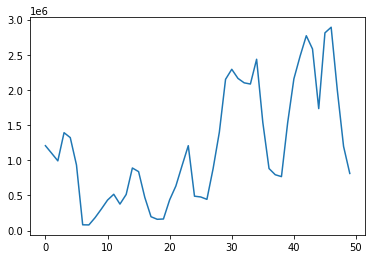

In [196]:
plt.figure()
df['rental'].plot(kind='line')
plt.show()
plt.close("all")

In [173]:
df['rental']

0     1207042.0
1     1099953.0
2      991348.0
3     1392038.0
4     1322104.0
5      932876.0
6       81886.0
7       80239.0
8      184188.0
9      305589.0
10     433286.0
11     516086.0
12     376520.0
13     513059.0
14     889873.0
15     837987.0
16     471749.0
17     196807.0
18     160261.0
19     164508.0
20     436971.0
21     633306.0
22     924089.0
23    1207134.0
24     488808.0
25     477844.0
26     444063.0
27     882383.0
28    1398500.0
29    2150968.0
30    2293822.0
31    2164039.0
32    2101117.0
33    2084182.0
34    2436367.0
35    1537240.0
36     882059.0
37     794147.0
38     767269.0
39    1533912.0
40    2157393.0
41    2480329.0
42    2770847.0
43    2582775.0
44    1734558.0
45    2811710.0
46    2891772.0
47    1990615.0
48    1196965.0
49     812249.0
Name: rental, dtype: float64

In [174]:
df['date']

0     201806
1     201807
2     201808
3     201809
4     201810
5     201811
6      01701
7      01702
8      01703
9      01704
10     01705
11     01706
12     01707
13     01708
14     01709
15     01710
16     01711
17     01712
18     01801
19     01802
20     01803
21     01804
22     01805
23     01806
24    201812
25    201901
26    201902
27    201903
28    201904
29    201905
30    201906
31    201907
32    201908
33    201909
34    201910
35    201911
36    201912
37    202001
38    202002
39    202003
40    202004
41    202005
42    202006
43    202007
44    202008
45    202009
46    202010
47    202011
48    202012
49    202101
Name: date, dtype: object

In [175]:
df

,date,rental
0,201806,1207042.0
1,201807,1099953.0
2,201808,991348.0
3,201809,1392038.0
4,201810,1322104.0
5,201811,932876.0
6,01701,81886.0
7,01702,80239.0
8,01703,184188.0
9,01704,305589.0


In [164]:
total_rental = pd.concat([bike_201701_201806['rental'], bike_201807_201811['rental'],
                          bike_201812_202101['rental']], axis = 0, ignore_index=True)
date = pd.concat([bike_201701_201806['date'], bike_201807_201811['date'],
                  bike_201812_202101['date']], axis = 0, ignore_index=True)
df = pd.concat([date, total_rental], axis = 1)

In [152]:
df = df.groupby('date').sum()
print(df)

           rental
date             
201701    81886.0
201702    80239.0
201703   184188.0
201704   305589.0
201705   433286.0
201706   516086.0
201707   376520.0
201708   513059.0
201709   889873.0
201710   837987.0
201711   471749.0
201712   196807.0
201801   160261.0
201802   164508.0
201803   436971.0
201804   633306.0
201805   924089.0
201806  2414176.0
201807  1099953.0
201808   991348.0
201809  1392038.0
201810  1322104.0
201811   932876.0
201812   488808.0
201901   477844.0
201902   444063.0
201903   882383.0
201904  1398500.0
201905  2150968.0
201906  2293822.0
201907  2164039.0
201908  2101117.0
201909  2084182.0
201910  2436367.0
201911  1537240.0
201912   882059.0
202001   794147.0
202002   767269.0
202003  1533912.0
202004  2157393.0
202005  2480329.0
202006  2770847.0
202007  2582775.0
202008  1734558.0
202009  2811710.0
202010  2891772.0
202011  1990615.0
202012  1196965.0
202101   812249.0


In [209]:
bike_201701_201806 = pd.read_csv('공공자전거 대여소별 이용정보_201701_201806.csv', encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201807_201811 = pd.read_csv("공공자전거 대여소별 이용정보_201807_11.csv", encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201812_202101 = pd.read_csv('공공자전거 대여소별 이용정보_201812_202101.csv', encoding='cp949',
                                 names=['group', 'spot', 'date', 'rental'],  header=None)

# date / data type cleaning
arrange_date1 = []
for i in bike_201701_201806['date']:
    arrange_date1.append(str(i)[1:5]+ str(i)[5:7])
bike_201701_201806['date'] = arrange_date1

arrange_date2 = []
for i in bike_201812_202101['date']:
    arrange_date2.append(str(i)[:4]+ str(i)[4:6])
bike_201812_202101['date'] = arrange_date2

arrange_rental = []
for i in bike_201807_201811['rental']:
    arrange_rental.append(int(float(i)))
bike_201807_201811['rental'] = arrange_rental

#NaN이 있는 행 삭제
bike_201812_202101 = bike_201812_202101.dropna()

#df 만들기
total_rental = pd.concat([bike_201701_201806['rental'], bike_201807_201811['rental'],
                          bike_201812_202101['rental']], axis = 0, ignore_index=True)
date = pd.concat([bike_201701_201806['date'], bike_201807_201811['date'],
                  bike_201812_202101['date']], axis = 0, ignore_index=True)
df = pd.concat([date, total_rental], axis = 1)


#date로 groupby
df = df.groupby('date', as_index = False).sum()


In [210]:
df['date']

0     201806
1     201807
2     201808
3     201809
4     201810
5     201811
6     201701
7     201702
8     201703
9     201704
10    201705
11    201706
12    201707
13    201708
14    201709
15    201710
16    201711
17    201712
18    201801
19    201802
20    201803
21    201804
22    201805
23    201806
24    201812
25    201901
26    201902
27    201903
28    201904
29    201905
30    201906
31    201907
32    201908
33    201909
34    201910
35    201911
36    201912
37    202001
38    202002
39    202003
40    202004
41    202005
42    202006
43    202007
44    202008
45    202009
46    202010
47    202011
48    202012
49    202101
Name: date, dtype: object

In [211]:
convert = []
for i in df['date']:
    convert.append(int(float(i)))
df['date'] = convert

In [213]:
df_2020

,date,rental
37,202001,794147.0
38,202002,767269.0
39,202003,1533912.0
40,202004,2157393.0
41,202005,2480329.0
42,202006,2770847.0
43,202007,2582775.0
44,202008,1734558.0
45,202009,2811710.0
46,202010,2891772.0


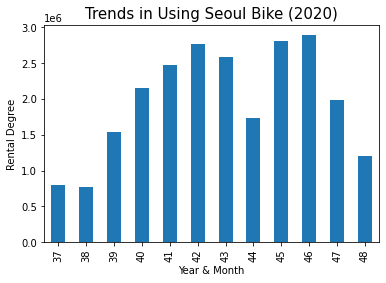

In [187]:
plt.figure()
df_2020['rental'].plot(kind='bar')
plt.title("Trends in Using Seoul Bike (2020)", fontsize = 15)
plt.xlabel('Year & Month')
plt.ylabel('Rental Degree')
plt.show()
plt.close("all")

In [225]:
bike_201701_201806 = pd.read_csv('공공자전거 대여소별 이용정보_201701_201806.csv', encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201807_201811 = pd.read_csv("공공자전거 대여소별 이용정보_201807_11.csv", encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201812_202101 = pd.read_csv('공공자전거 대여소별 이용정보_201812_202101.csv', encoding='cp949',
                                 names=['group', 'spot', 'date', 'rental'],  header=None)

#NaN이 있는 행 삭제
bike_201812_202101 = bike_201812_202101.dropna()

# date / data type cleaning
arrange_date1 = []
for i in bike_201701_201806['date']:
    arrange_date1.append(str(i)[1:5]+'-' + str(i)[5:7])
bike_201701_201806['date'] = arrange_date1

arrange_date2 = []
for i in bike_201812_202101['date']:
    arrange_date2.append(str(i)[:4]+'-' + str(i)[4:6])
bike_201812_202101['date'] = arrange_date2

arrange_date3 = []
for i in bike_201807_201811['date']:
    arrange_date3.append(str(i)[:4]+'-' + str(i)[4:6])
bike_201807_201811['date'] = arrange_date3

arrange_rental = []
for i in bike_201807_201811['rental']:
    arrange_rental.append(int(float(i)))
bike_201807_201811['rental'] = arrange_rental

#df 만들기
total_rental = pd.concat([bike_201701_201806['rental'], bike_201807_201811['rental'],
                          bike_201812_202101['rental']], axis = 0, ignore_index=True)
date = pd.concat([bike_201701_201806['date'], bike_201807_201811['date'],
                  bike_201812_202101['date']], axis = 0, ignore_index=True)
df = pd.concat([date, total_rental], axis = 1)

#date로 groupby
df = df.groupby('date').sum()

In [226]:
convert = []
for i in df['date']:
    convert.append(int(float(i)))
df['date'] = convert

KeyError: 'date'

In [200]:
df['date']

KeyError: 'date'

In [223]:
df_2020 = df.groupby('date', as_index = False).sum()

convert = []
for i in df_2020['date']:
    convert.append(int(float(i)))
df_2020['date'] = convert

df_2020 = df_2020[(df_2020['date'] >= 202001) & (df_2020['date'] != 202101)]
print(df_2020)

KeyError: 'date'

In [216]:
df_2020['date']

0     201701
1     201702
2     201703
3     201704
4     201705
5     201706
6     201707
7     201708
8     201709
9     201710
10    201711
11    201712
12    201801
13    201802
14    201803
15    201804
16    201805
17    201806
18    201807
19    201808
20    201809
21    201810
22    201811
23    201812
24    201901
25    201902
26    201903
27    201904
28    201905
29    201906
30    201907
31    201908
32    201909
33    201910
34    201911
35    201912
36    202001
37    202002
38    202003
39    202004
40    202005
41    202006
42    202007
43    202008
44    202009
45    202010
46    202011
47    202012
48    202101
Name: date, dtype: int64

In [218]:
 df_2020[(df_2020['date'] >= 202001) & (df_2020['date'] != 202101)]

,date,rental
36,202001,794147.0
37,202002,767269.0
38,202003,1533912.0
39,202004,2157393.0
40,202005,2480329.0
41,202006,2770847.0
42,202007,2582775.0
43,202008,1734558.0
44,202009,2811710.0
45,202010,2891772.0


In [259]:
bike_201701_201806 = pd.read_csv('공공자전거 대여소별 이용정보_201701_201806.csv', encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201807_201811 = pd.read_csv("공공자전거 대여소별 이용정보_201807_11.csv", encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201812_202101 = pd.read_csv('공공자전거 대여소별 이용정보_201812_202101.csv', encoding='cp949',
                                 names=['group', 'spot', 'date', 'rental'],  header=None)

#NaN이 있는 행 삭제
bike_201812_202101 = bike_201812_202101.dropna()

# date / data type cleaning
arrange_date1 = []
for i in bike_201701_201806['date']:
    arrange_date1.append(str(i)[1:5]+'-' + str(i)[5:7])
bike_201701_201806['date'] = arrange_date1

arrange_date2 = []
for i in bike_201812_202101['date']:
    arrange_date2.append(str(i)[:4]+'-' + str(i)[4:6])
bike_201812_202101['date'] = arrange_date2

arrange_date3 = []
for i in bike_201807_201811['date']:
    arrange_date3.append(str(i)[:4]+'-' + str(i)[4:6])
bike_201807_201811['date'] = arrange_date3

arrange_rental = []
for i in bike_201807_201811['rental']:
    arrange_rental.append(int(float(i)))
bike_201807_201811['rental'] = arrange_rental

#df 만들기
total_rental = pd.concat([bike_201701_201806['rental'], bike_201807_201811['rental'],
                          bike_201812_202101['rental']], axis = 0, ignore_index=True)
date = pd.concat([bike_201701_201806['date'], bike_201807_201811['date'],
                  bike_201812_202101['date']], axis = 0, ignore_index=True)
df = pd.concat([date, total_rental], axis = 1)

#date로 groupby
df = df.groupby(date, as_index = 'False').sum()

In [261]:
df

,rental
date,
2017-01,81886.0
2017-02,80239.0
2017-03,184188.0
2017-04,305589.0
2017-05,433286.0
2017-06,516086.0
2017-07,376520.0
2017-08,513059.0
2017-09,889873.0


In [251]:
df['date']

KeyError: 'date'

In [233]:
df

,rental
0,81886.0
1,80239.0
2,184188.0
3,305589.0
4,433286.0
5,516086.0
6,376520.0
7,513059.0
8,889873.0
9,837987.0


In [232]:
df_2020 = df.groupby('date', as_index = False).sum()

KeyError: 'date'

KeyError: 'date'

In [252]:
arrange_date4 = []
for i in df['date']:
    arrange_date4.append(int(float(str(i)[:4]+ str(i)[5:7])))
df['date'] = arrange_date4

KeyError: 'date'

In [262]:
df

,rental
date,
2017-01,81886.0
2017-02,80239.0
2017-03,184188.0
2017-04,305589.0
2017-05,433286.0
2017-06,516086.0
2017-07,376520.0
2017-08,513059.0
2017-09,889873.0


In [263]:
sns.countplot(x="date", hue="rental", palette='Accent', data=df)
plt.show()

ValueError: Could not interpret input 'date'

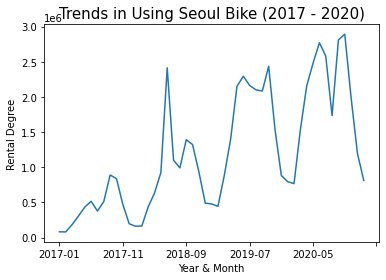

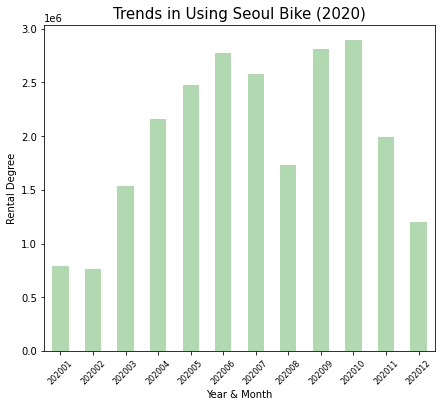

In [266]:
bike_201701_201806 = pd.read_csv('공공자전거 대여소별 이용정보_201701_201806.csv', encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201807_201811 = pd.read_csv("공공자전거 대여소별 이용정보_201807_11.csv", encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201812_202101 = pd.read_csv('공공자전거 대여소별 이용정보_201812_202101.csv', encoding='cp949',
                                 names=['group', 'spot', 'date', 'rental'],  header=None)

#NaN이 있는 행 삭제
bike_201812_202101 = bike_201812_202101.dropna()

# date / data type cleaning
arrange_date1 = []
for i in bike_201701_201806['date']:
    arrange_date1.append(str(i)[1:5]+'-' + str(i)[5:7])
bike_201701_201806['date'] = arrange_date1

arrange_date2 = []
for i in bike_201812_202101['date']:
    arrange_date2.append(str(i)[:4]+'-' + str(i)[4:6])
bike_201812_202101['date'] = arrange_date2

arrange_date3 = []
for i in bike_201807_201811['date']:
    arrange_date3.append(str(i)[:4]+'-' + str(i)[4:6])
bike_201807_201811['date'] = arrange_date3

arrange_rental = []
for i in bike_201807_201811['rental']:
    arrange_rental.append(int(float(i)))
bike_201807_201811['rental'] = arrange_rental

#df 만들기
total_rental = pd.concat([bike_201701_201806['rental'], bike_201807_201811['rental'],
                          bike_201812_202101['rental']], axis = 0, ignore_index=True)
date = pd.concat([bike_201701_201806['date'], bike_201807_201811['date'],
                  bike_201812_202101['date']], axis = 0, ignore_index=True)
bike = pd.concat([date, total_rental], axis = 1)

#date로 groupby
bike_bydate = bike.groupby('date').sum()

#plot1 - 따릉이 이용 건수 (추이) 파악
plt.figure()
bike_bydate['rental'].plot(kind='line')
plt.title("Trends in Using Seoul Bike (2017 - 2020)", fontsize = 15)
plt.xlabel('Year & Month')
plt.ylabel('Rental Degree')
plt.show()
plt.close("all")

#plot2 - 2020 한정 따릉이 이용 건수
arrange_date4 = []
for i in bike['date']:
    arrange_date4.append(int(float(str(i)[:4]+ str(i)[5:7])))
bike['date'] = arrange_date4

bike_2020 = bike[(bike['date'] >= 202001) & (bike['date'] != 202101)]
bike_by2020 = bike_2020.groupby('date').sum()

plt.figure(figsize=(7,6))
bike_by2020['rental'].plot(kind='bar', color = 'green', alpha = 0.3)
plt.title("Trends in Using Seoul Bike (2020)", fontsize = 15)
plt.xlabel('Year & Month')
plt.ylabel('Rental Degree')
plt.xticks(fontsize = 8, rotation = 45)
plt.show()
plt.close("all")


In [268]:
newbike = bike[(bike['date'] >= 201812)]

In [269]:
newbike

,date,rental
23610,201812,364.0
23611,201812,500.0
23612,201812,286.0
23613,201812,149.0
23614,201812,145.0
...,...,...
68879,202101,315.0
68880,202101,159.0
68881,202101,427.0
68882,202101,187.0


In [270]:
bike_201812_202101

,group,spot,date,rental
0,강남구,2301. 현대고등학교 건너편,2018-12,364.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),2018-12,500.0
2,강남구,2303. 논현역 7번출구,2018-12,286.0
3,강남구,2304. 신영 ROYAL PALACE 앞,2018-12,149.0
4,강남구,2305. MCM 본사 직영점 앞,2018-12,145.0
...,...,...,...,...
45274,중랑구,1474.서울중랑우체국,2021-01,315.0
45275,중랑구,1477.면목삼익아파트 앞,2021-01,159.0
45276,중랑구,1478.홈플러스 상봉점 앞,2021-01,427.0
45277,중랑구,1479.면목 홈플러스 2,2021-01,187.0


In [271]:
newbike = bike_201812_202101[(bike_201812_202101['date'] >= 201812)]

TypeError: '>=' not supported between instances of 'str' and 'int'

In [272]:
arrange_date5 = []
for i in bike_201812_202101['date']:
    arrange_date5.append(int(float(str(i)[:4]+ str(i)[5:7])))
bike_201812_202101['date'] = arrange_date5

newbike = bike_201812_202101[(bike_201812_202101['date'] >= 201812)]

In [273]:
newbike

,group,spot,date,rental
0,강남구,2301. 현대고등학교 건너편,201812,364.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812,500.0
2,강남구,2303. 논현역 7번출구,201812,286.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201812,149.0
4,강남구,2305. MCM 본사 직영점 앞,201812,145.0
...,...,...,...,...
45274,중랑구,1474.서울중랑우체국,202101,315.0
45275,중랑구,1477.면목삼익아파트 앞,202101,159.0
45276,중랑구,1478.홈플러스 상봉점 앞,202101,427.0
45277,중랑구,1479.면목 홈플러스 2,202101,187.0


In [295]:
newbike = bike_201812_202101[bike_201812_202101.group != '그룹명 없음']

In [296]:
print(newbike)

      group                            spot    date  rental
0       강남구                2301. 현대고등학교 건너편  201812   364.0
1       강남구  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  201812   500.0
2       강남구                  2303. 논현역 7번출구  201812   286.0
3       강남구         2304. 신영 ROYAL PALACE 앞  201812   149.0
4       강남구              2305. MCM 본사 직영점 앞  201812   145.0
...     ...                             ...     ...     ...
45274   중랑구                    1474.서울중랑우체국  202101   315.0
45275   중랑구                  1477.면목삼익아파트 앞  202101   159.0
45276   중랑구                 1478.홈플러스 상봉점 앞  202101   427.0
45277   중랑구                  1479.면목 홈플러스 2  202101   187.0
45278   중랑구                   1480. 용마지구대 옆  202101   207.0

[45256 rows x 4 columns]


In [305]:
newbike = bike_201812_202101.groupby('group').sum()


In [306]:
newbike

,date,rental
group,,
강남구,552767521,1635549.0
강동구,354248209,1588964.0
강북구,235693055,822310.0
강서구,525315298,3256705.0
관악구,294459456,1538923.0
광진구,343537357,2461949.0
구로구,375451617,1670652.0
그룹명 없음,3635718,1.0
금천구,255683208,721313.0


In [298]:
pivot = bike_201812_202101.pivot_table(index='date', columns='group', values='rental')
pivot

group,강남구,강동구,강북구,강서구,관악구,광진구,구로구,그룹명 없음,금천구,노원구,...,성북구,송파구,양천구,영등포구,용산구,은평구,정비센터,종로구,중구,중랑구
date,,,,,,,,,,,,,,,,,,,,,
201812,211.364583,283.103448,204.589744,244.317647,361.384615,508.745763,283.116667,NaN,176.022727,346.358209,...,299.517241,344.824742,267.735849,459.647727,233.948718,253.241935,NaN,468.190476,361.022727,239.923077
201901,205.968750,263.241379,205.897436,272.400000,357.538462,486.750000,276.852459,NaN,186.500000,325.208955,...,268.465517,338.636364,259.905660,462.647727,236.282051,241.677419,NaN,463.921875,360.863636,228.365385
201902,195.208333,257.035714,194.435897,257.129412,315.134615,453.233333,256.852459,NaN,163.568182,317.701493,...,247.482759,343.408163,233.603774,404.965909,236.461538,232.000000,NaN,402.406250,314.545455,211.961538
201903,405.071429,480.438596,390.179487,514.517647,632.961538,964.766667,465.126984,NaN,305.311111,622.764706,...,529.224138,684.676768,431.679245,817.875000,456.102564,439.951613,NaN,711.156250,571.500000,412.653846
201904,683.826531,754.315789,608.794872,829.905882,994.711538,1549.500000,749.682540,NaN,494.288889,974.000000,...,781.568966,1184.272727,690.113208,1396.806818,753.128205,646.564516,NaN,1027.343750,847.744186,617.846154
201905,993.979592,1285.631579,978.589744,1431.258824,1562.673077,2386.333333,1143.142857,NaN,724.577778,1610.250000,...,1170.762712,1882.292929,1077.222222,2047.761364,1178.461538,953.145161,NaN,1323.265625,1136.255814,1024.134615
201906,1025.755102,1419.403509,1070.897436,1722.741176,1666.288462,2441.066667,1319.301587,NaN,778.422222,1739.014706,...,1270.406780,1982.777778,1247.759259,2087.659091,1271.871795,1051.854839,16.333333,1305.846154,1164.488372,1120.807692
201907,946.876289,1387.456140,1004.128205,1659.611765,1581.750000,2197.033333,1269.609375,0.0,763.844444,1563.352941,...,1187.406780,1846.121212,1180.436364,1993.715909,1111.871795,1023.306452,24.142857,1302.307692,1161.046512,1073.615385
201908,881.255102,1376.263158,979.846154,1622.564706,1509.647059,2213.050000,1231.093750,0.0,709.533333,1547.268657,...,1138.155172,1793.191919,1152.400000,2015.852273,1096.153846,1020.806452,25.857143,1166.134328,1067.744186,1056.019231


In [299]:
newbike = bike_201812_202101[bike_201812_202101.group != '그룹명 없음']
newbike_bygroup = newbike.groupby('group').sum()
print(newbike)

      group                            spot    date  rental
0       강남구                2301. 현대고등학교 건너편  201812   364.0
1       강남구  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  201812   500.0
2       강남구                  2303. 논현역 7번출구  201812   286.0
3       강남구         2304. 신영 ROYAL PALACE 앞  201812   149.0
4       강남구              2305. MCM 본사 직영점 앞  201812   145.0
...     ...                             ...     ...     ...
45274   중랑구                    1474.서울중랑우체국  202101   315.0
45275   중랑구                  1477.면목삼익아파트 앞  202101   159.0
45276   중랑구                 1478.홈플러스 상봉점 앞  202101   427.0
45277   중랑구                  1479.면목 홈플러스 2  202101   187.0
45278   중랑구                   1480. 용마지구대 옆  202101   207.0

[45256 rows x 4 columns]


In [324]:
pivot = newbike.pivot_table(index='date', columns='group', values='rental')
pivot

group,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
date,,,,,,,,,,,,,,,,,,,,,
2018-12,211.364583,283.103448,204.589744,244.317647,361.384615,508.745763,283.116667,176.022727,346.358209,186.971429,...,398.419355,299.517241,344.824742,267.735849,459.647727,233.948718,253.241935,468.190476,361.022727,239.923077
2019-01,205.968750,263.241379,205.897436,272.400000,357.538462,486.750000,276.852459,186.500000,325.208955,185.628571,...,383.793651,268.465517,338.636364,259.905660,462.647727,236.282051,241.677419,463.921875,360.863636,228.365385
2019-02,195.208333,257.035714,194.435897,257.129412,315.134615,453.233333,256.852459,163.568182,317.701493,194.514286,...,352.265625,247.482759,343.408163,233.603774,404.965909,236.461538,232.000000,402.406250,314.545455,211.961538
2019-03,405.071429,480.438596,390.179487,514.517647,632.961538,964.766667,465.126984,305.311111,622.764706,400.171429,...,696.671875,529.224138,684.676768,431.679245,817.875000,456.102564,439.951613,711.156250,571.500000,412.653846
2019-04,683.826531,754.315789,608.794872,829.905882,994.711538,1549.500000,749.682540,494.288889,974.000000,620.200000,...,1109.301587,781.568966,1184.272727,690.113208,1396.806818,753.128205,646.564516,1027.343750,847.744186,617.846154
2019-05,993.979592,1285.631579,978.589744,1431.258824,1562.673077,2386.333333,1143.142857,724.577778,1610.250000,1010.085714,...,1696.634921,1170.762712,1882.292929,1077.222222,2047.761364,1178.461538,953.145161,1323.265625,1136.255814,1024.134615
2019-06,1025.755102,1419.403509,1070.897436,1722.741176,1666.288462,2441.066667,1319.301587,778.422222,1739.014706,1142.657143,...,1694.158730,1270.406780,1982.777778,1247.759259,2087.659091,1271.871795,1051.854839,1305.846154,1164.488372,1120.807692
2019-07,946.876289,1387.456140,1004.128205,1659.611765,1581.750000,2197.033333,1269.609375,763.844444,1563.352941,1132.848485,...,1596.746032,1187.406780,1846.121212,1180.436364,1993.715909,1111.871795,1023.306452,1302.307692,1161.046512,1073.615385
2019-08,881.255102,1376.263158,979.846154,1622.564706,1509.647059,2213.050000,1231.093750,709.533333,1547.268657,1067.818182,...,1552.476190,1138.155172,1793.191919,1152.400000,2015.852273,1096.153846,1020.806452,1166.134328,1067.744186,1056.019231


In [332]:
pivot2 = newbike.pivot_table(index=['date', 'group'], values='rental', aggfunc = 'sum')
pivot2

rental
date    group         
2018-12 강남구    20291.0
        강동구    16420.0
        강북구     7979.0
        강서구    20767.0
        관악구    18792.0
...                ...
2021-01 용산구    18203.0
        은평구    25442.0
        종로구    35643.0
        중구     20396.0
        중랑구    22773.0

[650 rows x 1 columns]

In [307]:
newbike = bike_201812_202101[(bike_201812_202101.group != '그룹명 없음') & (bike_201812_202101.group != '정비센터')]
newbike_bygroup = newbike.groupby('group').sum()

      group                            spot    date  rental
0       강남구                2301. 현대고등학교 건너편  201812   364.0
1       강남구  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  201812   500.0
2       강남구                  2303. 논현역 7번출구  201812   286.0
3       강남구         2304. 신영 ROYAL PALACE 앞  201812   149.0
4       강남구              2305. MCM 본사 직영점 앞  201812   145.0
...     ...                             ...     ...     ...
45274   중랑구                    1474.서울중랑우체국  202101   315.0
45275   중랑구                  1477.면목삼익아파트 앞  202101   159.0
45276   중랑구                 1478.홈플러스 상봉점 앞  202101   427.0
45277   중랑구                  1479.면목 홈플러스 2  202101   187.0
45278   중랑구                   1480. 용마지구대 옆  202101   207.0

[45087 rows x 4 columns]


In [308]:
newbike

,group,spot,date,rental
0,강남구,2301. 현대고등학교 건너편,201812,364.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),201812,500.0
2,강남구,2303. 논현역 7번출구,201812,286.0
3,강남구,2304. 신영 ROYAL PALACE 앞,201812,149.0
4,강남구,2305. MCM 본사 직영점 앞,201812,145.0
...,...,...,...,...
45274,중랑구,1474.서울중랑우체국,202101,315.0
45275,중랑구,1477.면목삼익아파트 앞,202101,159.0
45276,중랑구,1478.홈플러스 상봉점 앞,202101,427.0
45277,중랑구,1479.면목 홈플러스 2,202101,187.0


In [309]:
newbike_bygroup

,date,rental
group,,
강남구,552767521,1635549.0
강동구,354248209,1588964.0
강북구,235693055,822310.0
강서구,525315298,3256705.0
관악구,294459456,1538923.0
광진구,343537357,2461949.0
구로구,375451617,1670652.0
금천구,255683208,721313.0
노원구,393221238,2295919.0


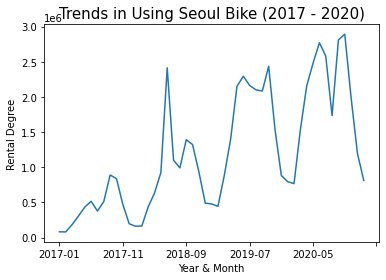

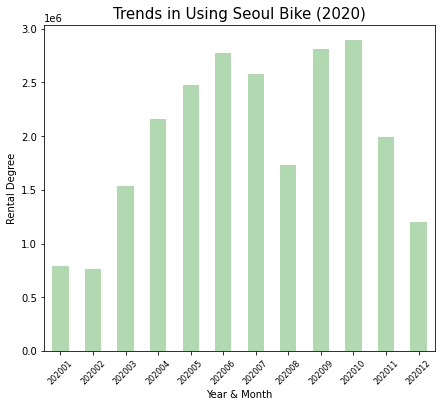

      group                            spot     date  rental
0       강남구                2301. 현대고등학교 건너편  2018-12   364.0
1       강남구  2302. 교보타워 버스정류장(신논현역 3번출구 후면)  2018-12   500.0
2       강남구                  2303. 논현역 7번출구  2018-12   286.0
3       강남구         2304. 신영 ROYAL PALACE 앞  2018-12   149.0
4       강남구              2305. MCM 본사 직영점 앞  2018-12   145.0
...     ...                             ...      ...     ...
45274   중랑구                    1474.서울중랑우체국  2021-01   315.0
45275   중랑구                  1477.면목삼익아파트 앞  2021-01   159.0
45276   중랑구                 1478.홈플러스 상봉점 앞  2021-01   427.0
45277   중랑구                  1479.면목 홈플러스 2  2021-01   187.0
45278   중랑구                   1480. 용마지구대 옆  2021-01   207.0

[45087 rows x 4 columns]


In [310]:
#load bike dataset
bike_201701_201806 = pd.read_csv('공공자전거 대여소별 이용정보_201701_201806.csv', encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201807_201811 = pd.read_csv("공공자전거 대여소별 이용정보_201807_11.csv", encoding='cp949',
                                 names=['date', 'spot_num', 'spot', 'rental'],  header=None)
bike_201812_202101 = pd.read_csv('공공자전거 대여소별 이용정보_201812_202101.csv', encoding='cp949',
                                 names=['group', 'spot', 'date', 'rental'],  header=None)

#NaN이 있는 행 삭제
bike_201812_202101 = bike_201812_202101.dropna()

# date / data type cleaning
arrange_date1 = []
for i in bike_201701_201806['date']:
    arrange_date1.append(str(i)[1:5]+'-' + str(i)[5:7])
bike_201701_201806['date'] = arrange_date1

arrange_date2 = []
for i in bike_201812_202101['date']:
    arrange_date2.append(str(i)[:4]+'-' + str(i)[4:6])
bike_201812_202101['date'] = arrange_date2

arrange_date3 = []
for i in bike_201807_201811['date']:
    arrange_date3.append(str(i)[:4]+'-' + str(i)[4:6])
bike_201807_201811['date'] = arrange_date3

arrange_rental = []
for i in bike_201807_201811['rental']:
    arrange_rental.append(int(float(i)))
bike_201807_201811['rental'] = arrange_rental

#df 만들기
total_rental = pd.concat([bike_201701_201806['rental'], bike_201807_201811['rental'],
                          bike_201812_202101['rental']], axis = 0, ignore_index=True)
date = pd.concat([bike_201701_201806['date'], bike_201807_201811['date'],
                  bike_201812_202101['date']], axis = 0, ignore_index=True)
bike = pd.concat([date, total_rental], axis = 1)

#date로 groupby
bike_bydate = bike.groupby('date').sum()

#plot1 - 따릉이 이용 건수 (추이) 파악
plt.figure()
bike_bydate['rental'].plot(kind='line')
plt.title("Trends in Using Seoul Bike (2017 - 2020)", fontsize = 15)
plt.xlabel('Year & Month')
plt.ylabel('Rental Degree')
plt.show()
plt.close("all")

#plot2 - 2020 한정 따릉이 이용 건수
arrange_date4 = []
for i in bike['date']:
    arrange_date4.append(int(float(str(i)[:4]+ str(i)[5:7])))
bike['date'] = arrange_date4

bike_2020 = bike[(bike['date'] >= 202001) & (bike['date'] != 202101)]
bike_by2020 = bike_2020.groupby('date').sum()

plt.figure(figsize=(7,6))
bike_by2020['rental'].plot(kind='bar', color = 'green', alpha = 0.3)
plt.title("Trends in Using Seoul Bike (2020)", fontsize = 15)
plt.xlabel('Year & Month')
plt.ylabel('Rental Degree')
plt.xticks(fontsize = 8, rotation = 45)
plt.show()
plt.close("all")

#plot3 - 2020 한정 따릉이 이용 건수 (group)
'''
arrange_date5 = []
for i in bike_201812_202101['date']:
    arrange_date5.append(int(float(str(i)[:4]+ str(i)[5:7])))
bike_201812_202101['date'] = arrange_date5

newbike = bike_201812_202101[(bike_201812_202101['date'] >= 201812)]
'''
newbike = bike_201812_202101[(bike_201812_202101.group != '그룹명 없음') & (bike_201812_202101.group != '정비센터')]
newbike_bygroup = newbike.groupby('group').sum()
print(newbike)


In [311]:
newbike_bygroup = newbike.groupby('group', 'date').sum()

ValueError: No axis named date for object type DataFrame

In [312]:
newbike

,group,spot,date,rental
0,강남구,2301. 현대고등학교 건너편,2018-12,364.0
1,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),2018-12,500.0
2,강남구,2303. 논현역 7번출구,2018-12,286.0
3,강남구,2304. 신영 ROYAL PALACE 앞,2018-12,149.0
4,강남구,2305. MCM 본사 직영점 앞,2018-12,145.0
...,...,...,...,...
45274,중랑구,1474.서울중랑우체국,2021-01,315.0
45275,중랑구,1477.면목삼익아파트 앞,2021-01,159.0
45276,중랑구,1478.홈플러스 상봉점 앞,2021-01,427.0
45277,중랑구,1479.면목 홈플러스 2,2021-01,187.0


In [313]:
newbike_bygroup = newbike.groupby('group').sum()

In [314]:
newbike_bygroup

,rental
group,
강남구,1635549.0
강동구,1588964.0
강북구,822310.0
강서구,3256705.0
관악구,1538923.0
광진구,2461949.0
구로구,1670652.0
금천구,721313.0
노원구,2295919.0


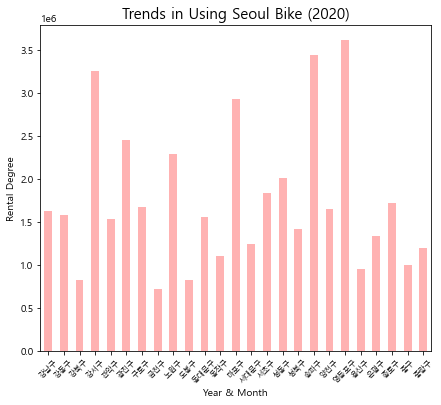

In [319]:
plt.figure(figsize=(7,6))
plt.rcParams['font.family'] = 'Malgun Gothic'
newbike_bygroup['rental'].plot(kind='bar', color = 'red', alpha = 0.3)
plt.title("Spots where people rent Seoul Bike", fontsize = 15)
plt.xlabel('Seoul District')
plt.ylabel('Rental Degree')
plt.xticks(fontsize = 7.5, rotation = 45)
plt.show()
plt.close("all")

In [320]:
newbike_bydate = newbike.groupby('date').sum()

In [321]:
newbike_bydate

,rental
date,
2018-12,488808.0
2019-01,477844.0
2019-02,444063.0
2019-03,882383.0
2019-04,1398500.0
2019-05,2150968.0
2019-06,2293724.0
2019-07,2163870.0
2019-08,2100936.0


In [322]:
newbike.groupby('date, 'group')

SyntaxError: invalid syntax (<ipython-input-322-b926fe8eaf6e>, line 1)

In [333]:
newbike[(newbike.group = '강서')]

SyntaxError: invalid syntax (<ipython-input-333-5ed884ea0db6>, line 1)

In [340]:
newbike[newbike.group == '강서구']

,group,spot,date,rental
193,강서구,1101. 개화동상사마을종점 버스정류장,2018-12,28.0
194,강서구,1102. 방화사거리 마을버스 버스정류장,2018-12,266.0
195,강서구,1103. 방화역 4번출구앞,2018-12,232.0
196,강서구,1105. 방화근린공원,2018-12,26.0
197,강서구,1106. 신방화사거리,2018-12,232.0
...,...,...,...,...
43501,강서구,3794. 안양천합수부(현대3차아파트),2021-01,228.0
43502,강서구,3795. 공항신성빌딩 앞,2021-01,77.0
43503,강서구,3796. 송정역 3번출구 앞,2021-01,86.0
43504,강서구,3797. 마곡수명산파크7단지 710동 앞,2021-01,57.0


In [341]:
newbike.group('date')

TypeError: 'Series' object is not callable

In [368]:
gangseo = newbike[newbike.group == '강서구']
songpa = newbike[newbike.group == '송파구']
yeongdeungpo = newbike[newbike.group == '영등포구']

arrange_spot1 = []
for i in gangseo['spot']:
    arrange_spot1.append(str(i)[:4])
gangseo['spot_num'] = arrange_spot1

arrange_spot2 = []
for i in songpa['spot']:
    arrange_spot2.append(str(i)[:4])
songpa['spot_num'] = arrange_spot2
    
arrange_spot3 = []
for i in yeongdeungpo['spot']:
    arrange_spot3.append(str(i)[:3])
yeongdeungpo['spot_num'] = arrange_spot3

<ipython-input-368-5c6e212da1fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangseo['spot_num'] = arrange_spot1
<ipython-input-368-5c6e212da1fc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songpa['spot_num'] = arrange_spot2
<ipython-input-368-5c6e212da1fc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [366]:
gangseo

,group,spot,date,rental,spot_num
193,강서구,1101. 개화동상사마을종점 버스정류장,2018-12,28.0,1101
194,강서구,1102. 방화사거리 마을버스 버스정류장,2018-12,266.0,1102
195,강서구,1103. 방화역 4번출구앞,2018-12,232.0,1103
196,강서구,1105. 방화근린공원,2018-12,26.0,1105
197,강서구,1106. 신방화사거리,2018-12,232.0,1106
...,...,...,...,...,...
43501,강서구,3794. 안양천합수부(현대3차아파트),2021-01,228.0,3794
43502,강서구,3795. 공항신성빌딩 앞,2021-01,77.0,3795
43503,강서구,3796. 송정역 3번출구 앞,2021-01,86.0,3796
43504,강서구,3797. 마곡수명산파크7단지 710동 앞,2021-01,57.0,3797


In [409]:
gangseo_by = gangseo.groupby('spot').sum()
songpa_by = songpa.groupby('spot_num').sum() #같음
yeongdeungpo_by = yeongdeungpo.groupby('spot_num').sum()


In [410]:
gangseo_by[gangseo_by['rental'] == max(gangseo_by['rental']) ]



,rental
spot,
2701. 마곡나루역 5번출구 뒤편,119753.0


In [391]:
songpa_by

,rental
spot_num,
1201,47671.0
1203,47862.0
1204,23323.0
1205,25562.0
1206,33669.0
...,...
2655,4671.0
2656,7061.0
2657,2593.0


In [392]:
yeongdeungpo_by

,rental
spot_num,
200,14396.0
201,35372.0
202,79075.0
203,36928.0
204,30238.0
...,...
299,4831.0
320,41628.0
321,32838.0


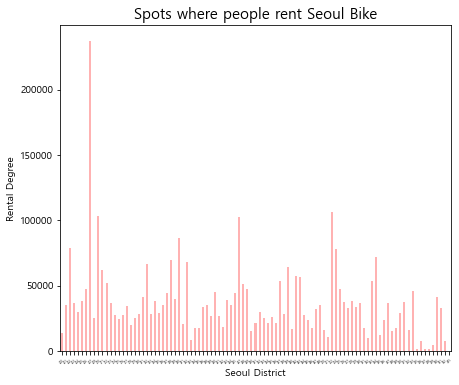

In [403]:
plt.figure(figsize=(7,6))
plt.rcParams['font.family'] = 'Malgun Gothic'
yeongdeungpo_by['rental'].plot(kind='bar', color = 'red', alpha = 0.3)
plt.title("Spots where people rent Seoul Bike", fontsize = 15)
plt.xlabel('Seoul District')
plt.ylabel('Rental Degree')
plt.xticks(fontsize = 3, rotation = 45)
plt.show()
plt.close("all")